Current dir should be *notebooks*. If not, you should import the three core modules (`material.py`, `mat_data.py`, `band.py`) manually

In [1]:
import os, sys
currentdir = os.getcwd()
if currentdir[-12:] == 'band-diagram':
    sys.path.insert(0, os.getcwd())
elif currentdir[-9:] == 'notebooks':
    os.chdir('..')
    sys.path.insert(0, os.getcwd())
    os.chdir('notebooks') 
else:
    print("You should 'import material, mat_data, band' manually")
    assert False

# plt rendering
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

*Plots are quite slow to render (about 3 s per plot). Runing all cells means waiting more than 20 s.*
Let's start defining some materials. Take a look at `mat_data.py` source for additional informations

In [2]:
import mat_data

doping = 1e15
Si_n = mat_data.Si(doping_type='n', doping=doping)
Si_p = mat_data.Si('p', doping)

Ge_n = mat_data.Ge(doping_type='n', doping=doping)
GaAs_n = mat_data.GaAs('n', 1e13)
AlGaAs_n = mat_data.AlGaAs(x=0.3, doping_type='n', doping=1e13)

Al = mat_data.Al
Au = mat_data.Au

We first analyse the effects of an applied potential to a simple p-n junction model. Here there are band diagrams of diode under forward and reverse bias:

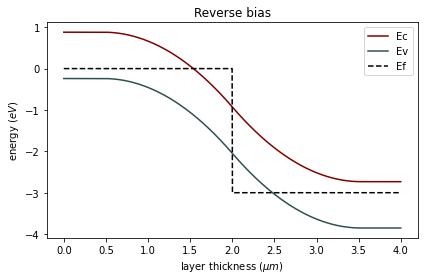

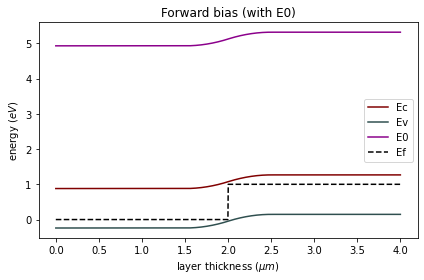

In [3]:
import band
import material

diode = band.band_diagram(
    [
        material.layer(2, Si_p), # 2 um
        material.layer(2, Si_n)  # 2 um
    ]
)

# reverse bias
diode.apply_voltage(3, index=1)
diode.bend()
diode.plot(title='Reverse bias')

diode.reset() # to make sure applied voltage is zero everywhere

# forward bias
diode.apply_voltage(-1) # index = rightmost = 1
diode.bend()
diode.plot(title='Forward bias (with E0)', display_E0=True) # we can also display vacuum level

diode.reset()

We note that the discontinuity on the Fermi level at the interface is a bit "unphysical": it's created under the assumption that voltage is constant within the entire piece of p- and n- silicon. The easiest way to pass over this problem is to bend the Fermi level, according to Poisson's equation for simplicity (I don't know if this action has a physical meaning). Reverse bias plot becomes:

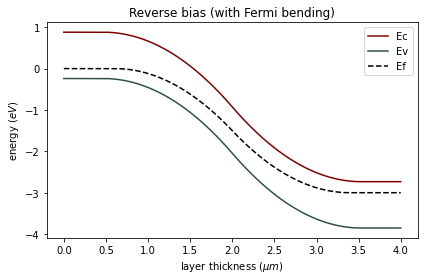

In [4]:
# reverse bias
diode.apply_voltage(3, index=1)
diode.bend(fermi=True) # <-- here the difference
diode.plot(title='Reverse bias (with Fermi bending)')

At the interface, the diode seems to display an intrinsic behaviour, as expected. We can plot also populations of electrons in conduction band and hole in valence band:

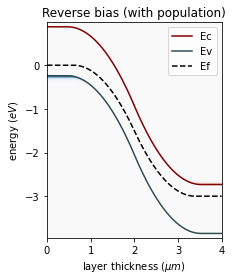

In [5]:
diode.plot(
    title='Reverse bias (with population)',
    display_eh=True, # displays population
    smearing=0.026 # correct smearing factor kB*T
)

Nothing dramatic seems to happen. Just for plotting purposes, we can introduce an artificial smearing factor, which increases the population far from Fermi level

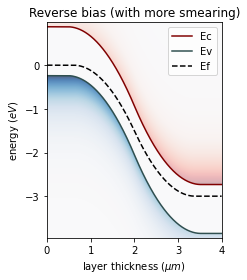

In [6]:
diode.plot(
    title='Reverse bias (with more smearing)',
    display_eh=True, # displays population
    smearing=0.5 # default value for smearing
)

From the image above, we can clearly see that the left region is p-doped (strong blue color) and the right region is n-doped (red color). At the center we can notice the typical intermediate behaviour of the depletion region. From here, we simply list some ideas:

# pn-junction

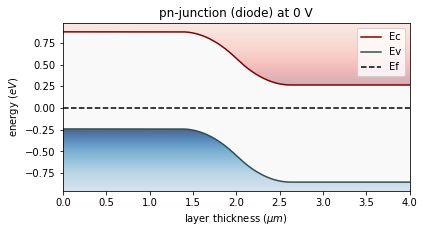

In [7]:
diode.reset()
diode.bend(fermi=True)
diode.plot(
    title='pn-junction (diode) at 0 V',
    display_eh=True
)

# schottky-junction (MS-contact)

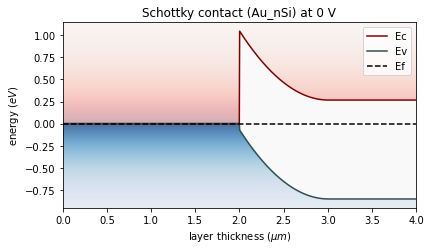

In [8]:
schottky = band.band_diagram(
    [
        material.layer(2, Au),
        material.layer(2, Si_n)
    ]
)
schottky.bend(fermi=True)
schottky.plot(
    title='Schottky contact (Au_nSi) at 0 V',
    display_eh=True
)

# Ohmic-contact (MS-contact)

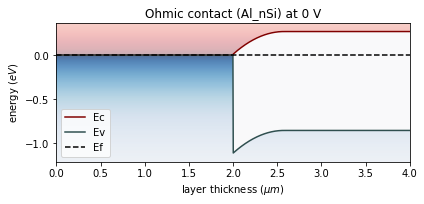

In [9]:
schottky = band.band_diagram(
    [
        material.layer(2, Al),
        material.layer(2, Si_n)
    ]
)
schottky.bend(fermi=True)
schottky.plot(
    title='Ohmic contact (Al_nSi) at 0 V',
    display_eh=True
)

# npn-junction (BJT)

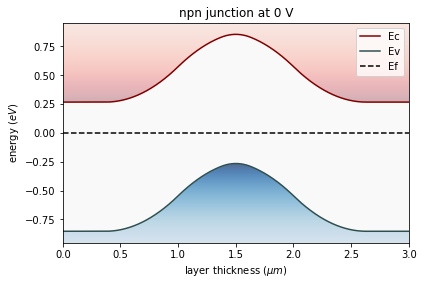

In [10]:
list_layers = [(1, Si_n), (1, Si_p), (1, Si_n)]
layers = [ material.layer(*el) for el in list_layers]
npn = band.band_diagram(layers=layers)

npn.bend(fermi=True)
npn.plot(
    title='npn junction at 0 V',
    display_eh=True
)

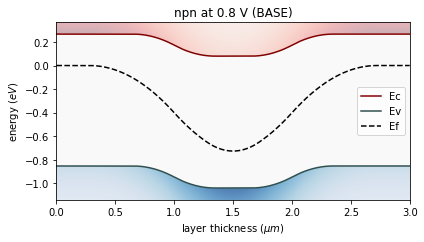

In [11]:
npn.reset()
npn.apply_voltage(volt=0.8, index=1)
npn.bend(fermi=True)
npn.plot(
    title='npn at 0.8 V (BASE)',
    display_eh=True
)

# heterojunction

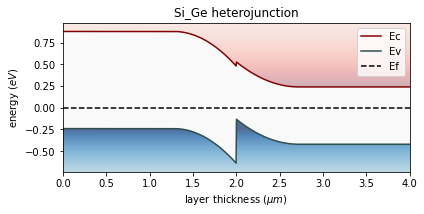

In [12]:
list_layers = [(2, Si_p), (2, Ge_n)]
layers = [material.layer(*el) for el in list_layers]
htj = band.band_diagram(layers)
htj.bend(fermi=True)
htj.plot(
    title='Si_Ge heterojunction',
    display_eh=True
)

# multi-quantum-well

c:\Users\alessandro\Documents\band-diagram\band.py:199: UserWarning: Depletion region larger than thickness of materials: [0, 1]
  warnings.warn(f"Depletion region larger than thickness of materials: {overflow}")
c:\Users\alessandro\Documents\band-diagram\band.py:199: UserWarning: Depletion region larger than thickness of materials: [1, 2]
  warnings.warn(f"Depletion region larger than thickness of materials: {overflow}")
c:\Users\alessandro\Documents\band-diagram\band.py:199: UserWarning: Depletion region larger than thickness of materials: [2, 3]
  warnings.warn(f"Depletion region larger than thickness of materials: {overflow}")
c:\Users\alessandro\Documents\band-diagram\band.py:199: UserWarning: Depletion region larger than thickness of materials: [3, 4]
  warnings.warn(f"Depletion region larger than thickness of materials: {overflow}")
c:\Users\alessandro\Documents\band-diagram\band.py:199: UserWarning: Depletion region larger than thickness of materials: [4, 5]
  warnings.warn(f"D

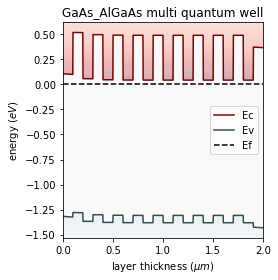

In [13]:
list_layers = [(0.1, GaAs_n), (0.1, AlGaAs_n)]*10
layers = [material.layer(*el) for el in list_layers]
mqw = band.band_diagram(layers)
mqw.bend()
mqw.plot(
    title='GaAs_AlGaAs multi quantum well',
    display_eh=True
)